<a href="https://colab.research.google.com/github/MaulanaJauhar/AI/blob/main/Kuis2_StatistikaKomputasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KUIS 2 Statistika Komputasi
#Nama : **Jauhar Maulana A'la**
#NIM : **2141720186**

#Soal 1
1.   Rata-rata konsentrasi kolesterol darah pada populasi dalam jumlah besar pria dewasa usia 50-60 tahun 
adalah 200mg/dl dengan simpangan baku 20mg/dl. Dianggap pengukuran kolesterol bersebaran 
normal. Berapakah peluang bahwa 100 pria dari kelompok umum ini akan memiliki kolesterol di 
bawah 204 ml/dl?

In [ ]:
from scipy.stats import norm

mean = 200  # rata-rata
std_dev = 20  # simpangan baku
x = 204  # nilai batas kolesterol
n = 100  # jumlah pria

# Menghitung z-score (standar skor)
z = (x - mean) / (std_dev / (n**0.5))

# Menghitung peluang menggunakan distribusi normal kumulatif
probability = norm.cdf(z)

# Menampilkan hasil
print("Peluang 100 pria akan memiliki kolesterol di bawah 204 mg/dL adalah ",
      probability," atau ",round(probability * 100,2),"%")


Peluang 100 pria akan memiliki kolesterol di bawah 204 mg/dL adalah  0.9772498680518208  atau  97.72 %


#Soal 2
2.  Misalkan spesies tanaman tertentu dengan populasi tidak diketahui (sangat banyak) memiliki varians 
tinggi 16 cm. Diambil sampel sebanyak 25 secara acak kemudian diperoleh rata-rata tingginya adalah 
15 cm. Hitunglah rentang nilai rata-rata populasi dari tinggi tanaman tersebut dengan tingkat 
kepercayaan 95%.

In [ ]:
import scipy.stats as stats
import math

n = 25
mean = 15
variance = 16
confidence_level = 0.95

standard_error = math.sqrt(variance) / math.sqrt(n)
z_score = abs(stats.norm.ppf((1 - confidence_level) / 2))

lower_bound = mean - z_score * standard_error
upper_bound = mean + z_score * standard_error

print("Rentang nilai rata-rata populasi dari tinggi tanaman tersebut dengan tingkat kepercayaan 95% adalah:")
print(lower_bound," , ",upper_bound)


Rentang nilai rata-rata populasi dari tinggi tanaman tersebut dengan tingkat kepercayaan 95% adalah:
13.432028812367957  ,  16.567971187632043


#Soal 3
3.  Dalam sebuah penelitian, dilakukan eksperimen terhadap dua buah kelompok untuk mengetahui 
dampak penggunaan tool pembelajaran. Berikut merupakan dari sampel yang mengikuti eksperimen.

##Dengan Tool = [32, 31, 32, 32, 33, 35, 32, 34, 31, 29, 36, 30, 33]
##Tanpa Tool  = [29, 30, 27, 28, 26, 27, 31, 27, 26, 28, 27, 24, 25]

###a.  Tentukan simpangan baku untuk kelompok “dengan tool”!
###b.  Tentukan simpangan baku untuk kelompok “tanpa tool”!
###c.  Apakah kedua kelompok tersebut homogen? Lengkapi jawaban Anda dengan hasil analisis dengan menggunakan Uji Harley

a. Tentukan simpangan baku untuk kelompok “dengan tool”!

In [ ]:
import pandas as pd

# membaca file excel
df = pd.read_excel('no3.xlsx')

# menentukan simpangan baku dari kolom tertentu
simpangan_baku1 = df['Dengantool'].std()

print("Hasil : ",simpangan_baku1)


Hasil :  1.9315199276138029


b. Tentukan simpangan baku untuk kelompok “tanpa tool”!

In [ ]:
import pandas as pd

# membaca file excel
df = pd.read_excel('no3.xlsx')

# menentukan simpangan baku dari kolom tertentu
simpangan_baku2 = df['Tanpatool'].std()

print("Hasil : ",simpangan_baku2)

Hasil :  1.931519927613803


c. Apakah kedua kelompok tersebut homogen? Lengkapi jawaban Anda dengan hasil analisis dengan menggunakan Uji Harley

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f

# mendefinisikan fungsi harley_test yang menerima dua parameter dari data
def harley_test(Dengantool, Tanpatool):
# menghitung variansi
    var1 = np.var(Dengantool)
    var2 = np.var(Tanpatool)
# membandingkan variansi terbesar dengan variansi terkecil dan menghitung nilai F
    if var1 > var2:
        f_value = var1 / var2
    else:
        f_value = var2 / var1
    df1 = len(Dengantool) - 1
    df2 = len(Tanpatool) - 1

    p_value = f.sf(f_value, df1, df2)
    return p_value
# membaca file excel
data = pd.read_excel('no3.xlsx')
Dengantool = data['Dengantool']
Tanpatool = data['Tanpatool']
# memanggil fungsi harley_test dengan parameter Dengantool dan Tanpatool
p_value = harley_test(Dengantool, Tanpatool)

print(p_value)
# mengecek apakah kedua kelompok homogen atau tidak
if p_value < 0.05:
    print("Kedua kelompok tidak termasuk homogen")
else:
    print("Kedua kelompok termasuk homogen")

0.4999999999999995
Kedua kelompok termasuk homogen


#Soal 4
4. Terdapat sebuah data kondisi cuaca di daerah Szeged, Hongaria tahun 2006 – 2016. Data direkam
pada internal setiap satu jam sekali. Sebagai seorang analis data, Anda diminta untuk memastikan 
bahwa data ini baik karena teman Anda akan melakukan permodelan regresi linier untuk memprediksi 
cuaca ke depan. Tugas Anda adalah,

####**a**. Gunakan uji KS untuk menentukan apakah atribut “Temprature” terdistribusi secara normal. Anda diminta untuk menggunakan p-value sebesar 0.05. Apakah “Temperature” terdistribusi normal? Berapa nilai KS-nya?
####**b**. Buatlah histogram dari “Temprature” untuk memastikan nilai yang Anda dapat dari poin a
####**c**. Gunakan uji KS untuk menentukan apakah atribut “Humidity” terdistribusi secara normal. Tingkat kepercayaan yang diinginkan adalah 99%. Apakah “Humidity” terdistribusi normal? Berapa nilai KS-nya?
####**d**. Buatlah histogram dari “Humidity” untuk memastikan apakah nilai yang dapat dari poin c

#a

In [ ]:
#import library
import pandas as pd
import scipy.stats as stats

#baca file csv ke dalam dataframe
df = pd.read_csv('weatherHistory.csv')

#akses nilai-nilai atribut Temperature dan simpan ke dalam array 1-D
temperature = df['Temperature'].values

#lakukan uji KS seperti sebelumnya
statistic, pvalue = stats.kstest(temperature, 'norm')

#tampilkan hasil
print('Statistic:', statistic)

#tentukan apakah atribut "Temperature" terdistribusi normal
if pvalue < 0.05:
    print('Atribut "Temperature" tidak terdistribusi normal.')
else:
    print('Atribut "Temperature" terdistribusi normal.')


Statistic: 0.8187651455395293
Atribut "Temperature" tidak terdistribusi normal.


B. histogram

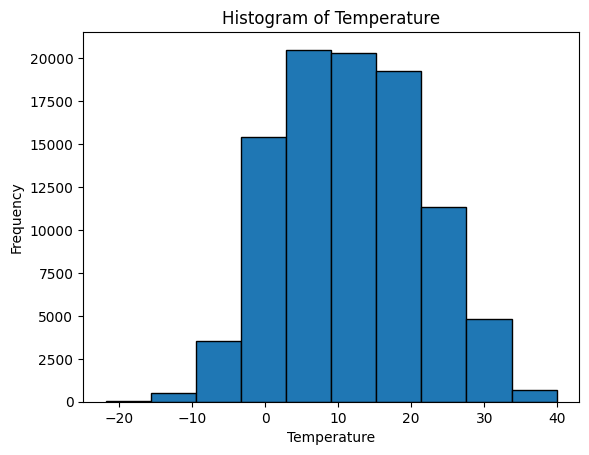

In [ ]:
import matplotlib.pyplot as plt

#buat plot histogram dari array 1-D temperature
plt.hist(temperature, bins=10, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()

c. 

In [ ]:
#import library
import pandas as pd
import scipy.stats as stats

#baca file csv ke dalam dataframe
df = pd.read_csv('weatherHistory.csv')

#akses nilai-nilai atribut Humidity dan simpan ke dalam array 1-D
humidity = df['Humidity'].values

#lakukan uji KS
statistic, pvalue = stats.kstest(humidity, 'norm')

#tampilkan hasil
print('Statistic:', statistic)

#tentukan apakah atribut "Humidity" terdistribusi normal dengan level signifikansi 0.01
if pvalue < 0.01:
    print('Atribut "Humidity" tidak terdistribusi normal.')
else:
    print('Atribut "Humidity" terdistribusi normal.')


Statistic: 0.5990171816042561
Atribut "Humidity" tidak terdistribusi normal.


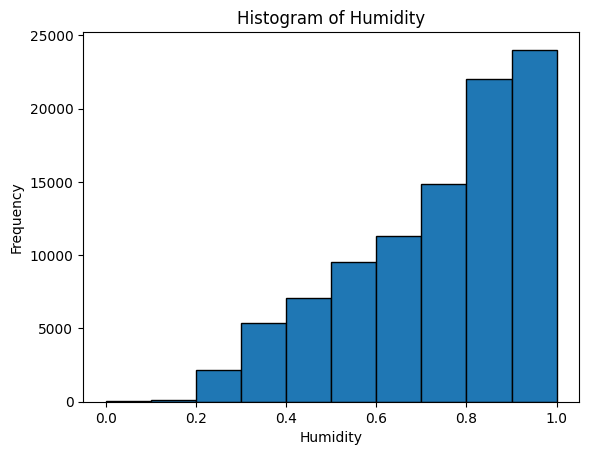

In [ ]:
import matplotlib.pyplot as plt

#buat plot histogram dari array 1-D humidity
plt.hist(humidity, bins=10, edgecolor='black')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity')
plt.show()
